In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from astropy.io import fits
import camb
from camb import model, initialpower
# from .likelihood import EE_100x143
import sys
sys.path.append('/Users/valentinagenesini/Documents/thesis/ELICA/')
# from elica import EE_100x143
from elica import mHL



In [28]:
ntaus = 101
ntausover = 10001
taus = np.linspace(0,0.10,ntaus)
tausover = np.linspace(0,0.10,ntausover)

#p,l = np.loadtxt('../../lowell_bware/results/lowl_simall_sroll2_v2_EE_p_tau.dat',unpack=True)

In [29]:
# compute_like = EE_100x143()
compute_like = mHL()

like = []


In [30]:
for itau,tau in enumerate(taus):
    print(itau)
    pars = camb.CAMBparams()
    As = 1.875*np.exp(2*tau)*1e-9
    pars.set_cosmology(H0=67.5, ombh2=0.02236, omch2=0.1202, mnu=0.06, omk=0, tau=tau)
    pars.InitPower.set_params(As=As, ns=0.9649, r=0)
    pars.set_for_lmax(300, lens_potential_accuracy=0);
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cls_EE = powers['total'][2:31,1]
#    cls_EE = np.loadtxt('../taulike_cls/taulike_cls_'+str(itau).zfill(4)+'_lensedtotCls.dat',
#                        unpack=True,
#                        usecols=(2,),
#                       )
#    cls_EE = np.concatenate(([0.,0.],cls_EE))
    like.append(compute_like.log_likelihood(cls_EE)*2)

0
1
2
 Check input parameters an Reionization_xe
 function in the Reionization module
 Check input parameters an Reionization_xe
 function in the Reionization module
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [31]:
# lik_esterna=np.loadtxt('/Users/valentinagenesini/Documents/thesis/ELICA/elica/data/100x143/log_posterior_100x143_over10000sims_from_external_notebook')
lik_esterna=np.loadtxt('/Users/valentinagenesini/Documents/thesis/ELICA/elica/data/mHL/log_posterior_mHL_500_sims_only_from_external_notebook')

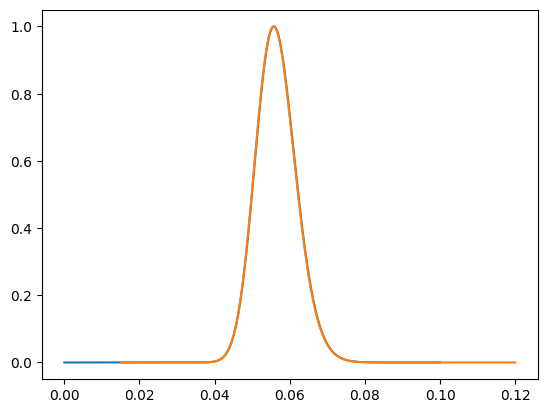

In [32]:

like = np.array(like)

likeover = interp1d(taus,like,kind='cubic')(tausover)

ext_tau_range=np.linspace(0.015, 0.12, 1681)

ext_like=np.array(2*lik_esterna)


probover = np.exp(0.5*(likeover-likeover.max()))
probover_ext = np.exp(0.5*(ext_like-ext_like.max()))
probover_ext.shape
plt.plot(tausover,probover)
plt.plot(ext_tau_range,probover_ext)
#plt.plot(p,l)

In [9]:
# mu = (p*l).sum()/l.sum()
# sigma = np.sqrt((p**2*l).sum()/l.sum() - mu**2)
# print(mu,sigma)

NameError: name 'p' is not defined

In [10]:
mu = (tausover*probover).sum()/probover.sum()
sigma = np.sqrt((tausover**2*probover).sum()/probover.sum() - mu**2)
print(mu,sigma)

0.057424772111067314 0.006944956487548636


In [56]:
import compute_CL

In [57]:
val = compute_CL.compute_CL(tausover,probover)

In [58]:
val[1],val[1]-val[3],val[4]-val[1]

(0.05644205395264742, 0.006282053952647415, 0.005207946047352585)

In [59]:
val[1],val[2]

(0.05644205395264742, 0.005850969413018321)

In [ ]:
data = np.load('data/sroll2_cobaya/probEE.npy')
like = []

In [ ]:
for itau,tau in enumerate(taus):
    cls_EE = np.loadtxt('../taulike_cls/taulike_cls_'+str(itau).zfill(4)+'_lensedtotCls.dat',
                        unpack=True,
                        usecols=(2,),
                       )
    like.append(np.diag(data[:,(cls_EE[0:28]/0.0001).astype(int)]).sum()*2)

In [ ]:
like = np.array(like)
likeover = interp1d(taus,like,kind='cubic')(tausover)
probover = np.exp(0.5*(likeover-likeover.max()))
plt.plot(tausover,probover)
plt.plot(p,l)

In [ ]:
mu = (tausover*probover).sum()/probover.sum()
sigma = np.sqrt((tausover**2*probover).sum()/probover.sum() - mu**2)
print(mu,sigma)

In [ ]:
hdu = fits.open('../../lowell_bware/clik/simall_100x143_sroll2_v3_EE_Aplanck.clik/clik/check_param')

In [ ]:
l = np.arange(30)
ll = l*(l+1)/2/np.pi
plt.plot(l,hdu[0].data[0:30]*ll)

In [138]:
compute_like.log_likelihood(hdu[0].data[0:30]*ll)

-195.11285103049872

In [139]:
-195.112851

-195.112851

In [11]:
import numpy as np
from cobaya.likelihoods.planck_2018_lowl.EE_sroll2 import EE_sroll2
from astropy.io import fits

compute_like = EE_sroll2()

h = fits.open('../../lowell_bware/clik/simall_100x143_sroll2_v3_EE_Aplanck.clik/clik/check_param')
l = np.arange(30)
ll = l*(l+1)/2/np.pi
like = compute_like.log_likelihood(h[0].data[0:30]*ll)
np.allclose(like,-195.112851,rtol=1e-8)

True

In [50]:
np.exp(2.924)*np.exp(-2*0.056)

16.64317129721834